In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

# Importing the data from CSV-files and setting extent and resolution
geo_model = gp.create_data([0,2000.,0,2000.,0,2000.],[50,50,50], 
      path_o = os.pardir+"/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = os.pardir+"/input_data/tut_chapter1/simple_fault_model_points.csv") 

../../gempy/core/gempy_front.py:664: FutureWarning: This method will get deprecated in the next version of gempy. It still exist only to keepthe behaviour equal to older version. Use init_data.
  "the behaviour equal to older version. Use init_data.", FutureWarning)
../../gempy/core/data.py:1493: RuntimeWarning: overflow encountered in double_scalars
  (extent[2] - extent[3]) ** 2 +


No id or order_series in the input
Length of formation_names does not match number of formations


Length of formation_names does not match number of formations
already basement


../../gempy/core/gempy_front.py:110: FutureWarning: values_to_default option will get deprecated in the next version of gempy. It still exist only to keep the behaviour equal to older version. See set_values_to_default.
  "to keep the behaviour equal to older version. See set_values_to_default.", FutureWarning)


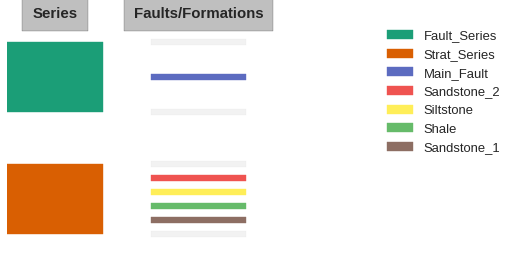

In [2]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_model, {"Fault_Series":'Main_Fault', 
                         "Strat_Series": ('Sandstone_2','Siltstone',
                                          'Shale', 'Sandstone_1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['Main_Fault', 
                                         'Sandstone_2','Siltstone',
                                         'Shale', 'Sandstone_1',
                                         ], verbose=1) 


In [3]:
v = gp.plot.plot_data_3D(geo_model)

closing vtk


In [4]:
v.resume()

closing vtk


In [5]:
v.close()

In [4]:
geo_model.interfaces.df.head()

,X,Y,Z,formation,series,id,order_series,isFault,X_r,Y_r,Z_r
0,800.0,50.0,750.0,Shale,Strat_Series,4,2,False,0.486942,0.250100,0.460626
1,800.0,150.0,700.0,Shale,Strat_Series,4,2,False,0.486942,0.276416,0.447468
2,800.0,300.0,700.0,Shale,Strat_Series,4,2,False,0.486942,0.315889,0.447468
3,800.0,500.0,800.0,Shale,Strat_Series,4,2,False,0.486942,0.368521,0.473784
4,800.0,1000.0,1000.0,Shale,Strat_Series,4,2,False,0.486942,0.500100,0.526416


In [5]:
geo_model.modify_interfaces([0], X=[2000], Y=[2000], Z=[2000])

In [6]:
geo_model.interfaces.df.head()

,X,Y,Z,formation,series,id,order_series,isFault,X_r,Y_r,Z_r
0,2000.0,2000.0,2000.0,Shale,Strat_Series,4,2,False,0.802732,0.763258,0.789574
1,800.0,150.0,700.0,Shale,Strat_Series,4,2,False,0.486942,0.276416,0.447468
2,800.0,300.0,700.0,Shale,Strat_Series,4,2,False,0.486942,0.315889,0.447468
3,800.0,500.0,800.0,Shale,Strat_Series,4,2,False,0.486942,0.368521,0.473784
4,800.0,1000.0,1000.0,Shale,Strat_Series,4,2,False,0.486942,0.500100,0.526416


In [8]:
gp.get_data(geo_model, 'additional data')

values
Structure isLith                                                                     True
          isFault                                                                    True
          number faults                                                                 1
          number formations                                                             6
          number formations per series                                             [1, 5]
          len formations interfaces                                    [5, 9, 13, 15, 15]
          len series interfaces                                                   [5, 52]
          len series orientations                                                  [1, 2]
Options   dtype                                                                   float64
          output                                                                  geology
          theano_optimizer                                                   fast_compile
          device                                                                      cpu
          verbosity                                                                   NaN
Kringing  range                                                                    3464.1
          $C_o$                                                                    285714
          drift equations                                                          [3, 3]
          nugget grad                                                                0.01
          nugget scalar                                                             1e-06
Rescaling rescaling factor                                                           3800
          centers                       X     850.0
Y    1000.0
Z     900.0
dtype: flo...

In [ ]:
%debug

In [7]:
gp.set_interpolation_data(geo_model)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of df:  1


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,NaN


In [8]:
gp.compute_model(geo_model)


Lithology ids 
  [6. 6. 6. ... 4. 4. 4.] 
Lithology scalar field 
  [29.81810379 29.82264137 29.82741737 ... 29.95845413 29.95820808
 29.95814514] 
Fault block 
  [[1. 1. 1. ... 2. 2. 2.]]

In [36]:
%%timeit
gp.compute_model(geo_model, compute_mesh=False)

3.84 s ± 29.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


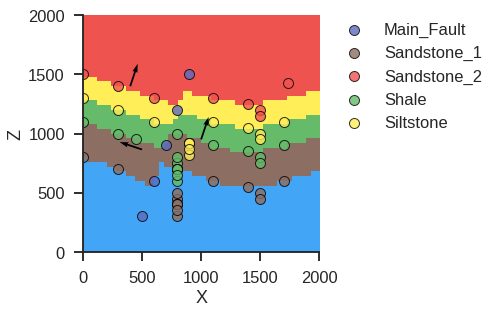

In [13]:
gp.plot.plot_section(geo_model, 25, plot_data=True)

In [37]:
ver, sim = gp.get_surfaces(geo_model)

In [38]:
ver

{'Main_Fault': array([[ 400.        ,    0.        ,   40.        ],
        [ 386.66667938,    0.        ,    0.        ],
        [ 400.        ,   40.        ,   40.        ],
        ...,
        [1013.33335876, 1960.        , 1880.        ],
        [1026.66664124, 1960.        , 1920.        ],
        [1040.        , 1960.        , 1960.        ]]),
 'Sandstone_2': array([[   0.        ,    0.        , 1398.47808838],
        [   0.        ,   40.        , 1398.75671387],
        [  40.        ,    0.        , 1382.39257812],
        ...,
        [1960.        , 1840.337677  , 1200.        ],
        [1960.        , 1920.        , 1190.87234497],
        [1960.        , 1960.        , 1187.0249176 ]]),
 'Siltstone': array([[  30.24418592,   40.        , 1160.        ],
        [  40.        ,    0.        , 1156.03790283],
        [  30.81129313,    0.        , 1160.        ],
        ...,
        [1960.        , 1880.        ,  986.14318848],
        [1960.        , 1920.      

In [39]:
gp.plot.plot_surfaces_3D(geo_model, list(ver.values()), list(sim.values()))

closing vtk


In [14]:
v = Out[5]

In [23]:
v.vv.set_surfaces(list(v2.values()), list(s2.values()))

AttributeError: 'list' object has no attribute 'values'

In [25]:
v.vv.set_surfaces(v2,s2)

In [18]:
v.vv.ren_list

[(vtkRenderingOpenGL2Python.vtkOpenGLRenderer)0x7f9263451888,
 (vtkRenderingOpenGL2Python.vtkOpenGLRenderer)0x7f921a2f3d68,
 (vtkRenderingOpenGL2Python.vtkOpenGLRenderer)0x7f921a2f3dc8,
 (vtkRenderingOpenGL2Python.vtkOpenGLRenderer)0x7f921a2f3d08]

In [20]:
v.vv.surf_rend_1

[(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f921a2ccb28,
 (vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f9215abe9a8,
 (vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f9215abee28,
 (vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f9215abec48,
 (vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f9215abee88]

In [22]:
v2, s2 = v.vv.update_surfaces_real_time()

computing model


In [24]:
s2

[array([[   2,    1,    0],
        [   3,    1,    2],
        [   0,    5,    4],
        ...,
        [3297, 3294, 3298],
        [3299, 3295, 3296],
        [3298, 3295, 3299]], dtype=int32), array([[   2,    1,    0],
        [   3,    1,    2],
        [   3,    4,    1],
        ...,
        [3760, 3693, 3758],
        [3760, 3694, 3693],
        [3761, 3694, 3760]], dtype=int32), array([[   2,    1,    0],
        [   0,    1,    3],
        [   0,    5,    4],
        ...,
        [3904, 3837, 3903],
        [3904, 3839, 3837],
        [3905, 3839, 3904]], dtype=int32), array([[   2,    1,    0],
        [   3,    1,    2],
        [   3,    4,    1],
        ...,
        [4046, 3978, 4045],
        [4046, 3980, 3978],
        [4047, 3980, 4046]], dtype=int32), array([[   2,    1,    0],
        [   0,    1,    3],
        [   0,    5,    4],
        ...,
        [4122, 4057, 4120],
        [4122, 4058, 4057],
        [4123, 4058, 4122]], dtype=int32)]

In [26]:
v.vv.interactor.Render()

In [30]:
v.resume()

closing vtk


In [9]:
gp.plot.plot_surfaces_3D_real_time(geo_model, None, None)

computing model
computing model
[array([[ 400.        ,    0.        ,   40.        ],
       [ 386.66667938,    0.        ,    0.        ],
       [ 400.        ,   40.        ,   40.        ],
       ...,
       [1013.33335876, 1960.        , 1880.        ],
       [1026.66664124, 1960.        , 1920.        ],
       [1040.        , 1960.        , 1960.        ]]), array([[  32.2682929 ,   40.        , 1240.        ],
       [   0.        ,    0.        , 1236.36787415],
       [   0.        ,   12.88934469, 1240.        ],
       ...,
       [1960.        , 1521.57302856, 1960.        ],
       [1944.98168945, 1560.        , 1960.        ],
       [1929.76776123, 1600.        , 1960.        ]]), array([[  24.30583477,   40.        , 1000.        ],
       [   0.        ,    0.        ,  993.34793091],
       [   0.        ,   21.58536673, 1000.        ],
       ...,
       [1960.        , 1939.1053772 , 1840.        ],
       [1953.61022949, 1960.        , 1840.        ],
       [1

In [40]:
geo_model.interfaces

,X,Y,Z,formation,series,id,order_series,isFault,X_r,Y_r,Z_r
52,700.000000,1000.000000,900.000000,Main_Fault,Fault_Series,1,1,True,0.460626,0.500100,0.500100
53,600.000000,1000.000000,600.000000,Main_Fault,Fault_Series,1,1,True,0.434311,0.500100,0.421153
54,500.000000,1000.000000,300.000000,Main_Fault,Fault_Series,1,1,True,0.407995,0.500100,0.342205
55,800.000000,1000.000000,1200.000000,Main_Fault,Fault_Series,1,1,True,0.486942,0.500100,0.579047
56,900.000000,1000.000000,1500.000000,Main_Fault,Fault_Series,1,1,True,0.513258,0.500100,0.657995
44,206.924396,676.624558,1584.859277,Sandstone_2,Strat_Series,2,2,False,0.276416,0.500100,0.657995
45,300.000000,1000.000000,1400.000000,Sandstone_2,Strat_Series,2,2,False,0.355363,0.500100,0.631679
46,600.000000,1000.000000,1300.000000,Sandstone_2,Strat_Series,2,2,False,0.434311,0.500100,0.605363
47,1100.000000,1000.000000,1300.000000,Sandstone_2,Strat_Series,2,2,False,0.565889,0.500100,0.605363
48,1400.000000,1000.000000,1250.000000,Sandstone_2,Strat_Series,2,2,False,0.644837,0.500100,0.592205
